<a href="https://colab.research.google.com/github/abufarhad/Android-Project/blob/master/Vertebrae_detection_and_identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!unzip -q "/content/drive/My Drive/Spine Segmentation/Dataset/Spine 2 DS/testing_dataset.zip"

In [2]:
!unzip -q "/content/drive/My Drive/Spine Segmentation/Dataset/Spine 2 DS/training_dataset.zip"

In [3]:
!unzip -q "/content/SpineFinder-master.zip"

In [ ]:
!pip install SimpleITK

!pip install tensorflow
!pip install elasticdeform
!pip install keras-metrics

In [ ]:
!pip install keras

In [ ]:
import numpy as np
x=np.load("/content/data/train/2504978-1-sample.npy")
x

In [6]:
!python3 "/content/SpineFinder-master/generate_detection_samples.py"

Generating 300 detection samples of size 64 x 64 x 80 for 60 scans
1 / 60
2 / 60
3 / 60
4 / 60
5 / 60
6 / 60
7 / 60
8 / 60
9 / 60
10 / 60
11 / 60
12 / 60
13 / 60
14 / 60
15 / 60
16 / 60
17 / 60
18 / 60
19 / 60
20 / 60
21 / 60
22 / 60
23 / 60
24 / 60
25 / 60
26 / 60
27 / 60
28 / 60
29 / 60
30 / 60
31 / 60
32 / 60
33 / 60
34 / 60
35 / 60
36 / 60
37 / 60
38 / 60
39 / 60
40 / 60
41 / 60
42 / 60
43 / 60
44 / 60
45 / 60
46 / 60
47 / 60
48 / 60
49 / 60
50 / 60
51 / 60
52 / 60
53 / 60
54 / 60
55 / 60
56 / 60
57 / 60
58 / 60
59 / 60
60 / 60


In [ ]:
!python3 "/content/SpineFinder-master/train_detection_model.py"

2020-07-15 02:03:50.786647: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2020-07-15 02:03:52.296549: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-07-15 02:03:52.330312: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-07-15 02:03:52.330888: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.73GiB deviceMemoryBandwidth: 298.08GiB/s
2020-07-15 02:03:52.330929: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2020-07-15 02:03:52.332597: I tensorflow/stream_executor/platform/default

In [ ]:
import nibabel as nib
import matplotlib as plt
img=nib.load("/content/spine-1/patient0001/2804506/2804506.nii.gz")
img_h=img.header
print(img_h)  

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 512 512 103   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1.     0.3125 0.3125 2.5    0.     0.     0.     0.    ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : aligned
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 1.0
qoffset_x       : -0.0
qoffset_y       : -0.0
qoffset_z       : 0.0
srow_x          : [-0.

In [ ]:
img.affine

array([[-0.3125,  0.    ,  0.    , -0.    ],
       [ 0.    , -0.3125,  0.    , -0.    ],
       [ 0.    ,  0.    ,  2.5   ,  0.    ],
       [ 0.    ,  0.    ,  0.    ,  1.    ]])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  This is separate from the ipykernel package so we can avoid doing imports until


512 256


Text(0.5, 1.0, 'Mask')

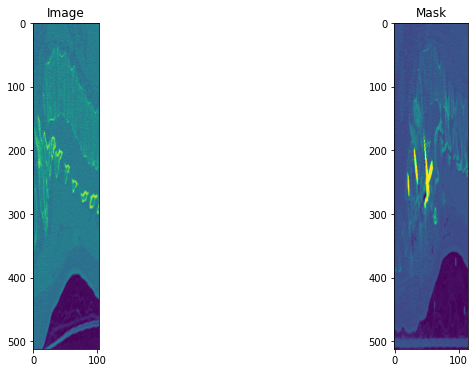

In [ ]:
import matplotlib.pyplot as plt
test_image=nib.load("/content/spine-1/patient0001/2804506/2804506.nii.gz").get_data()
test_mask=nib.load("/content/spine-1/patient0001/2805012/2805012.nii.gz").get_data()



print(test_image.shape[0]  , test_image.shape[0]//2)

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (12, 6))
ax1.imshow(test_image[test_image.shape[1]//2])
ax1.set_title('Image')
ax2.imshow(test_mask[test_mask.shape[0]//2])
ax2.set_title('Mask')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  This is separate from the ipykernel package so we can avoid doing imports until


512 256


Text(0.5, 1.0, 'test_image1')

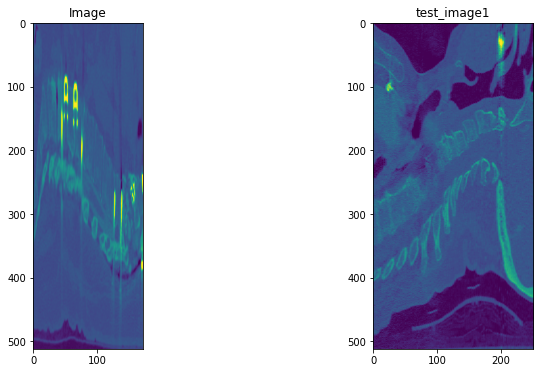

In [ ]:
import matplotlib.pyplot as plt
test_image=nib.load("/content/spine-test-data/4517454.nii.gz").get_data()
test_image1=nib.load("/content/spine-test-data/4533963.nii.gz").get_data()



print(test_image.shape[0]  , test_image.shape[0]//2)

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (12, 6))
ax1.imshow(test_image[test_image.shape[0]//2])
ax1.set_title('Image')
ax2.imshow(test_image1[test_image1.shape[0]//2])
ax2.set_title('test_image1')

In [ ]:
epi_img = nib.load('/content/spine-test-data/4517454.nii.gz')
epi_img_data = epi_img.get_fdata()
epi_img_data.shape

(512, 512, 172)

Text(0.5, 0.98, 'Center slices for EPI image')

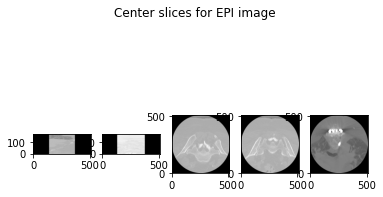

In [ ]:
import matplotlib.pyplot as plt
def show_slices(slices):
    """ Function to display row of image slices """
    fig, axes = plt.subplots(1, len(slices))
    for i, slice in enumerate(slices):
        axes[i].imshow(slice.T, cmap="gray", origin="lower")

slice_0 = epi_img_data[26, :, :]
slice_1 = epi_img_data[:, 30, :]
slice_2 = epi_img_data[:, :, 16]
slice_3 = epi_img_data[:, :, 8]
slice_4 = epi_img_data[:, :, 171]

show_slices([slice_0, slice_1, slice_2 , slice_3, slice_4 ])
plt.suptitle("Center slices for EPI image") 